# Statistical Inference - Seller.py

In [1]:
# to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [2]:
# imports
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

## 1 - Sellers.py

The goal is to find sellers who have repeatedly been underperforming vs. others and understand why.  
This will help us shape our recommendations about how to improve Olist's profit margin for the future.

Let's create a dataframe with the following features:

In [3]:
table = {
    "feature_name": [
        "seller_id", "seller_city", "seller_state", "delay_to_carrier",
        "wait_time", "date_first_sale", "date_last_sale", "months_on_olist",
        "share_of_five_stars", "share_of_one_stars", "review_score", "n_orders",
        "quantity", "quantity_per_order", "sales"
    ],
    "type": [
        "str", "str", "str", "float",
        "float", "datetime", "datetime", "float",
        "float", "float", "float", "int",
        "int", "float", "float"
    ],
    "description": [
        "the id of the seller **UNIQUE**",
        "the city where seller is located",
        "the state where seller is located",
        "returns 0 if the order is delivered before the shipping_limit_date, otherwise the value of the delay",
        "average wait_time (duration of deliveries) per seller",
        "date of the first sale on Olist",
        "date of the last sale on Olist",
        "round number of months on Olist",
        "share of five-star reviews for orders in which the seller was involved",
        "share of one-star reviews for orders in which the seller was involved",
        "average review score for orders in which the seller was involved",
        "number of unique orders the seller was involved with",
        "total number of items sold by this seller",
        "average number of items per order for this seller",
        "total sales associated with this seller (excluding freight value) in BRL"
    ]
}

df = pd.DataFrame(table)
df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)

In [4]:
from olist.seller import Seller
from olist.order import Order
from olist.order import Olist
sellers = Seller().get_training_data()
review_score = Order().get_review_score()
order_items = Olist().get_data()['order_items']
orders = Olist().get_data()['orders']

In [5]:
sellers

seller_id        seller_city seller_state  \
0     3442f8959a84dea7ee197c632cb2df15           campinas           SP   
1     d1b65fc7debc3361ea86b5f14c68d2e2         mogi guacu           SP   
2     ce3ad9de960102d0677a81f5d0bb7b2d     rio de janeiro           RJ   
3     c0f3eea2e14555b6faeea3dd58c1b1c3          sao paulo           SP   
4     51a04a8a6bdcb23deccc82b0b80742cf  braganca paulista           SP   
...                                ...                ...          ...   
2962  98dddbc4601dd4443ca174359b237166            sarandi           PR   
2963  f8201cab383e484733266d1906e2fdfa            palhoca           SC   
2964  74871d19219c7d518d0090283e03c137          sao paulo           SP   
2965  e603cf3fec55f8697c9059638d6c8eb5            pelotas           RS   
2966  9e25199f6ef7e7c347120ff175652c3b            taubate           SP   

      delay_to_carrier  wait_time     date_first_sale      date_last_sale  \
0             0.000000  13.018588 2017-05-05 16:25:11 2017-08-30 12:50:19   
1             0.000000   9.065716 2017-03-29 02:10:34 2018-06-06 20:15:21   
2             0.000000   4.042292 2018-07-30 12:44:49 2018-07-30 12:44:49   
3             0.000000   5.667187 2018-08-03 00:44:08 2018-08-03 00:44:08   
4             3.353727  35.314861 2017-11-14 12:15:25 2017-11-14 12:15:25   
...                ...        ...                 ...                 ...   
2962          0.000000   8.230822 2018-07-14 03:10:19 2018-07-23 15:34:03   
2963          0.000000  13.045797 2017-06-17 15:30:11 2018-08-11 19:55:17   
2964          0.000000   3.606625 2018-04-05 17:09:46 2018-08-21 19:25:15   
2965          0.000000   6.657634 2017-02-09 02:43:17 2017-06-16 17:30:16   
2966          0.000000   8.199456 2017-03-27 10:10:27 2017-03-27 10:10:27   

      months_on_olist  n_orders  quantity  quantity_per_order     sales  \
0                 4.0         3         3            1.000000    218.70   
1                14.0        40        41            1.025000  11703.07   
2                 0.0         1         1            1.000000    158.00   
3                 0.0         1         1            1.000000     79.99   
4                 0.0         1         1            1.000000    167.99   
...               ...       ...       ...                 ...       ...   
2962              0.0         2         2            1.000000    158.00   
2963             14.0        10        10            1.000000    889.00   
2964              5.0         6         7            1.166667    550.04   
2965              4.0         8        11            1.375000    297.00   
2966              0.0         1         1            1.000000     12.50   

      share_of_five_stars  share_of_one_stars  review_score  cost_of_reviews  \
0                0.333333            0.333333      3.000000              140   
1                0.731707            0.048780      4.560976              240   
2                1.000000            0.000000      5.000000                0   
3                1.000000            0.000000      5.000000                0   
4                0.000000            1.000000      1.000000              100   
...                   ...                 ...           ...              ...   
2962             1.000000            0.000000      5.000000                0   
2963             0.500000            0.100000      4.100000              140   
2964             1.000000            0.000000      5.000000                0   
2965             0.636364            0.000000      4.454545               50   
2966             0.000000            0.000000      4.000000                0   

      revenues   profits  
0      341.870   201.870  
1     2290.307  2050.307  
2       15.800    15.800  
3        7.999     7.999  
4       16.799   -83.201  
...        ...       ...  
2962    15.800    15.800  
2963  1208.900  1068.900  
2964   455.004   455.004  
2965   349.700   299.700  
2966     1.250     1.250  

[2967 rows x 18 columns]

In [6]:
sellers.describe()

delay_to_carrier    wait_time  months_on_olist     n_orders  \
count       2967.000000  2967.000000      2967.000000  2967.000000   
mean           0.385636    12.139417         6.025615    33.650489   
std            2.295812     7.069233         5.994211   107.182856   
min            0.000000     1.214178         0.000000     1.000000   
25%            0.000000     8.287658         1.000000     2.000000   
50%            0.000000    11.115143         4.000000     7.000000   
75%            0.000000    14.231984        10.000000    23.000000   
max           45.434039   189.863160        23.000000  1854.000000   

          quantity  quantity_per_order          sales  share_of_five_stars  \
count  2967.000000         2967.000000    2967.000000          2967.000000   
mean     37.897203            1.157337    4568.852187             0.589328   
std     121.514362            0.439557   14191.836779             0.283198   
min       1.000000            1.000000       6.500000             0.000000   
25%       3.000000            1.000000     239.850000             0.455121   
50%       8.000000            1.000000     896.000000             0.600000   
75%      26.000000            1.142857    3583.995000             0.760952   
max    2033.000000           15.000000  229472.630000             1.000000   

       share_of_one_stars  review_score  cost_of_reviews      revenues  \
count         2967.000000   2967.000000      2967.000000   2967.000000   
mean             0.126832      4.074920       666.211662    938.934427   
std              0.195180      0.824301      2372.888920   1660.761719   
min              0.000000      1.000000         0.000000      0.650000   
25%              0.000000      3.785714         0.000000    120.593500   
50%              0.061947      4.200000       100.000000    460.480000   
75%              0.166667      4.636364       460.000000   1184.409000   
max              1.000000      5.000000     44620.000000  24387.263000   

            profits  
count   2967.000000  
mean     272.722765  
std     1591.682389  
min   -26349.517000  
25%       12.000000  
50%      210.994000  
75%      605.971000  
max    17197.605000

In [7]:
sellers.dtypes

seller_id                      object
seller_city                    object
seller_state                   object
delay_to_carrier              float64
wait_time                     float64
date_first_sale        datetime64[ns]
date_last_sale         datetime64[ns]
months_on_olist               float64
n_orders                        int64
quantity                        int64
quantity_per_order            float64
sales                         float64
share_of_five_stars           float64
share_of_one_stars            float64
review_score                  float64
cost_of_reviews                 int64
revenues                      float64
profits                       float64
dtype: object

In [8]:
review_score.keys()

Index(['order_id', 'dim_is_five_star', 'dim_is_one_star', 'review_score'], dtype='object')

In [9]:
review_score

order_id  dim_is_five_star  dim_is_one_star  \
0      73fc7af87114b39712e6da79b0a377eb                 0                0   
1      a548910a1c6147796b98fdf73dbeba33                 1                0   
2      f9e4b658b201a9f2ecdecbb34bed034b                 1                0   
3      658677c97b385a9be170737859d3511b                 1                0   
4      8e6bfb81e283fa7e4f11123a3fb894f1                 1                0   
...                                 ...               ...              ...   
99219  2a8c23fee101d4d5662fa670396eb8da                 1                0   
99220  22ec9f0669f784db00fa86d035cf8602                 1                0   
99221  55d4004744368f5571d1f590031933e4                 1                0   
99222  7725825d039fc1f0ceb7635e3f7d9206                 0                0   
99223  90531360ecb1eec2a1fbb265a0db0508                 0                1   

       review_score  
0                 4  
1                 5  
2                 5  
3                 5  
4                 5  
...             ...  
99219             5  
99220             5  
99221             5  
99222             4  
99223             1  

[99224 rows x 4 columns]

In [10]:
order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [11]:
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

For each seller we need to compute:
- the proportion of extremely high reviews ('share_of_five_stars') and the proportion of extremely poor reviews ('share_of_one_stars')
- the (average) 'review_score'

Each low-rated order will indeed have a negative impact on Olist's reputation and this is modeled by the 'cost_of_review'.  

This will help us compute the total `cost_of_review` per seller later on!

In [12]:
# Let's call our function in seller.py
sellers_review_score = Seller().get_review_score()

In [13]:
sellers_review_score

seller_id  share_of_five_stars  \
0     0015a82c2db000af6aaaf3ae2ecb0532             0.666667   
1     001cca7ae9ae17fb1caed9dfb1094831             0.512712   
2     001e6ad469a905060d959994f1b41e4f             0.000000   
3     002100f778ceb8431b7a1020ff7ab48f             0.553571   
4     003554e2dce176b5555353e4f3555ac8             1.000000   
...                                ...                  ...   
3085  ffcfefa19b08742c5d315f2791395ee5             0.000000   
3086  ffdd9f82b9a447f6f8d4b91554cc7dd3             0.650000   
3087  ffeee66ac5d5a62fe688b9d26f83f534             0.642857   
3088  fffd5413c0700ac820c7069d66d98c89             0.550000   
3089  ffff564a4f9085cd26170f4732393726             0.200000   

      share_of_one_stars  review_score  cost_of_reviews  
0               0.333333      3.666667              100  
1               0.144068      3.902542             4750  
2               1.000000      1.000000              100  
3               0.125000      3.982143             1110  
4               0.000000      5.000000                0  
...                  ...           ...              ...  
3085            1.000000      1.000000              100  
3086            0.050000      4.250000              240  
3087            0.142857      4.214286              200  
3088            0.183333      3.866667             1360  
3089            0.650000      2.100000             1420  

[3090 rows x 5 columns]

## 2 - Sellers' EDA

### 2.1 - Distributions

In [14]:
sellers_review_score.keys()

Index(['seller_id', 'share_of_five_stars', 'share_of_one_stars',
       'review_score', 'cost_of_reviews'],
      dtype='object')

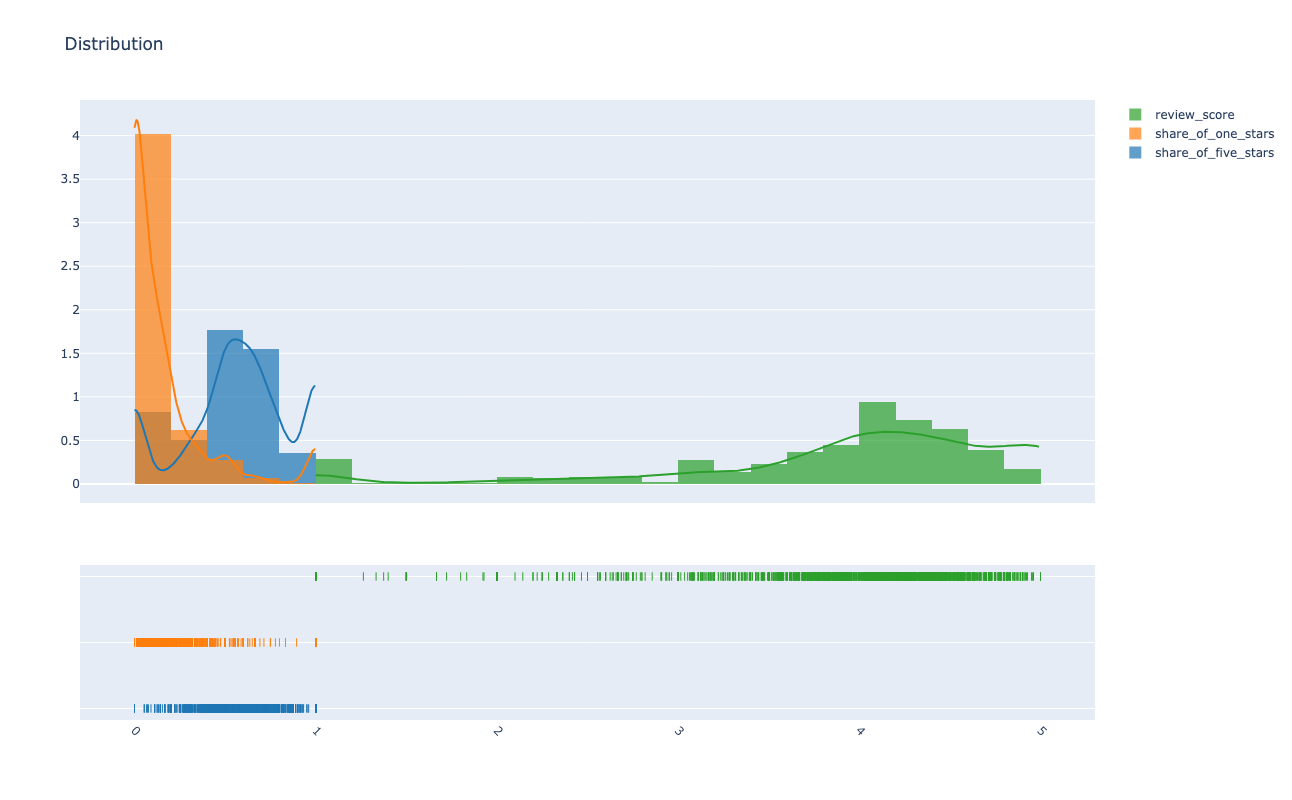

In [15]:

# Group data together
hist_data = [sellers_review_score['share_of_five_stars'],sellers_review_score['share_of_one_stars'],sellers_review_score['review_score']]

group_labels = ['share_of_five_stars', 'share_of_one_stars', 'review_score']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2)
# Update the layout for better appearance
fig.update_layout(
    title='Distribution',
    # coloraxis_colorbar=dict(title='Correlation'),
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0),
    width=900, 
    height=800
)
fig.show()

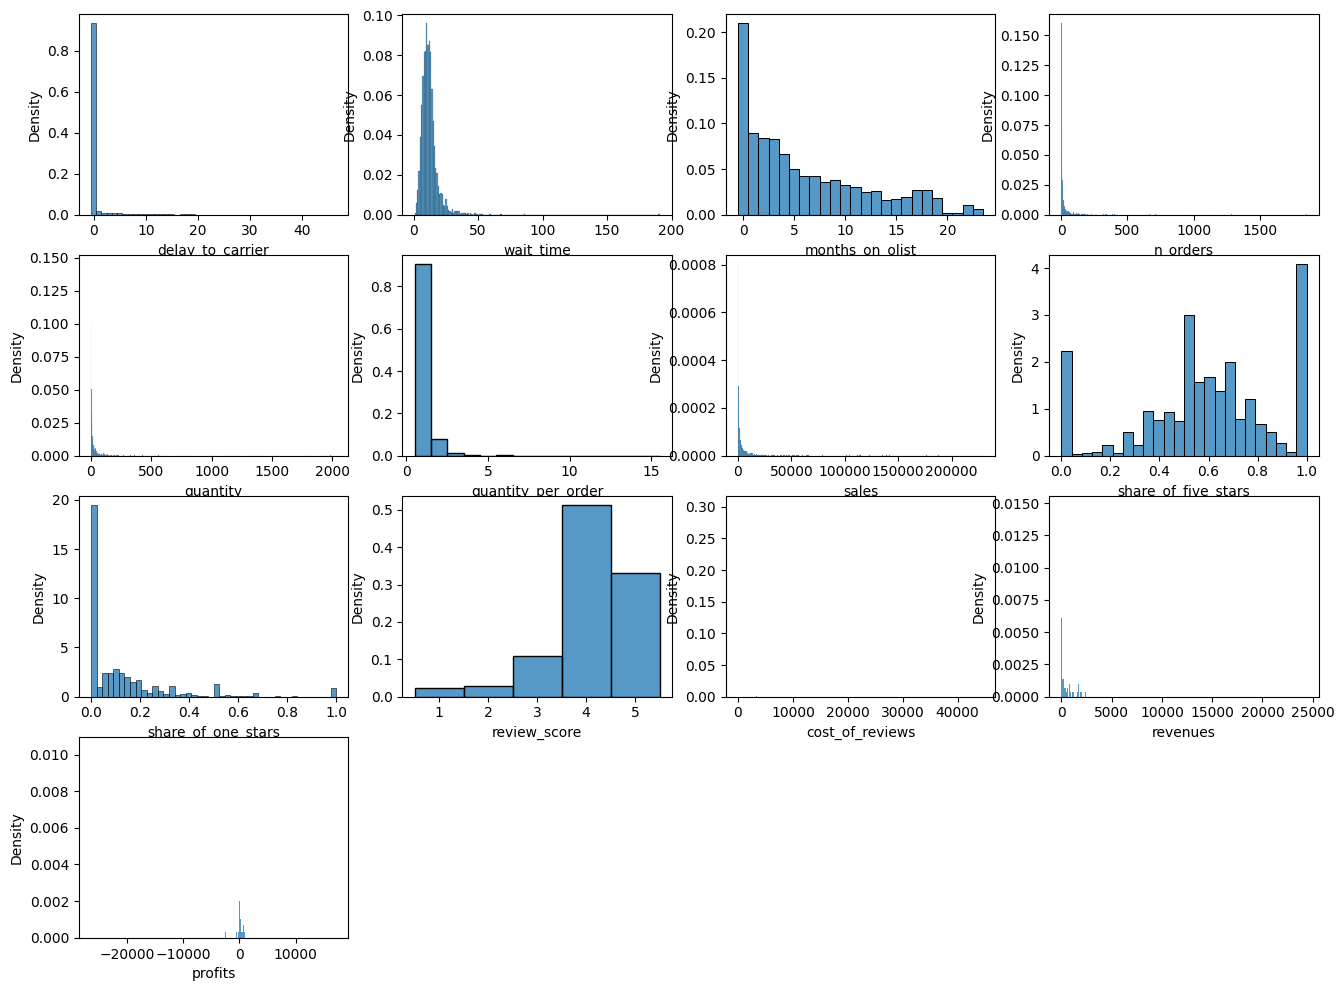

In [16]:
plt.figure(figsize=(16,12))
for (i, col) in enumerate(sellers.describe().columns):#["wait_time", "delay_to_carrier", "avg_review_score", "n_orders", "quantity", "price"]):
    plt.subplot(4,4,i+1)
    sns.histplot(sellers[col], kde=False, stat='density', discrete=[True,None][col in ['share_of_one_stars','share_of_five_stars','sales']]);

#### Note:

Some group of sellers have a very low review score.

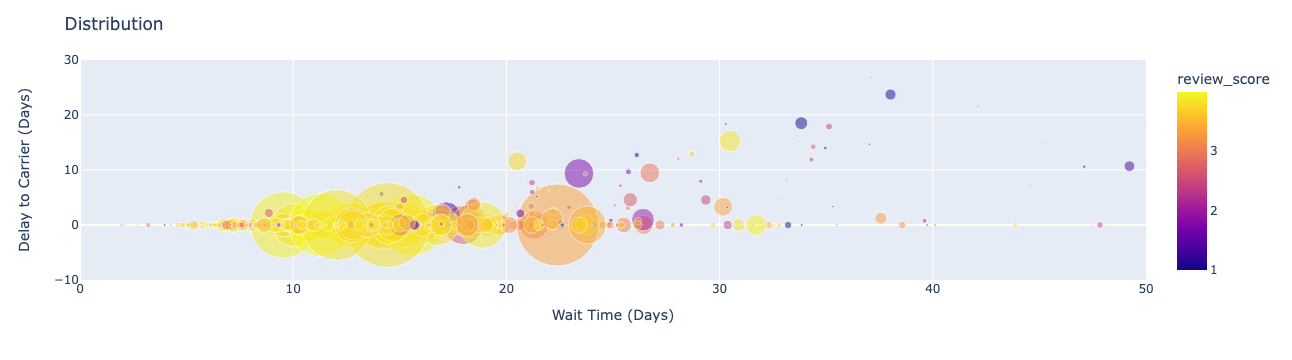

In [17]:
fig = px.scatter(data_frame = sellers[sellers['review_score'] < 4],
    x="wait_time",
    y="delay_to_carrier",
    size="sales",
    color="review_score",
    size_max = 60,
    range_x=[0, 50], 
    range_y=[-10, 30],
    opacity = 0.5
)
# Update the layout for better appearance
fig.update_layout(
    title='Distribution',
    # coloraxis_colorbar=dict(title='Correlation'),
    xaxis_title='Wait Time (Days)',
    yaxis_title='Delay to Carrier (Days)',
)
fig.show()

### 2.2 - Review score with Multivariate-OLS Model

In [18]:
def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized

In [19]:
features = ['delay_to_carrier', 'wait_time', 'n_orders', 'quantity', 'quantity_per_order', 'sales']
sellers_standardized = standardize(sellers, features)
model = smf.ols(formula=f"review_score ~ {'+ '.join(features)}", data=sellers_standardized).fit()

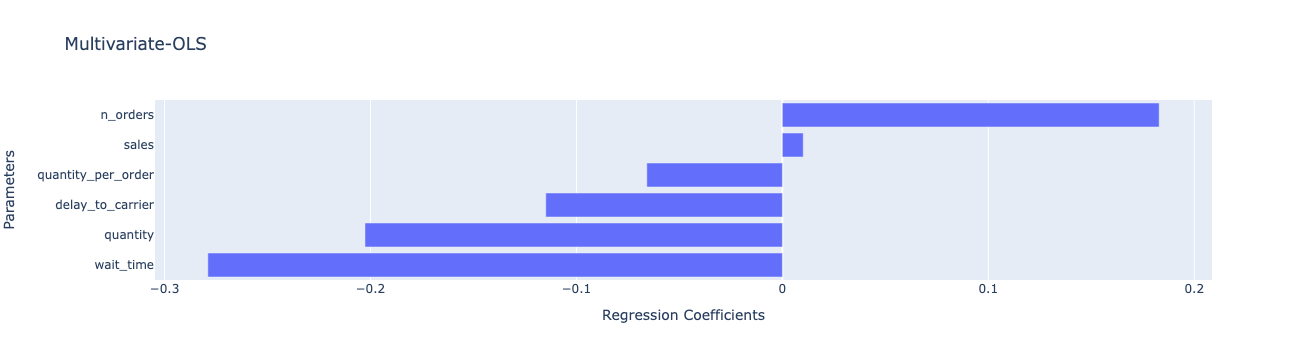

In [20]:
# Sorting the parameters and excluding the first one (e.g., intercept)
sorted_params = model.params[1:].sort_values()

# Create a horizontal bar plot using Plotly
fig = go.Figure(go.Bar(
    x=sorted_params.values,
    y=sorted_params.index,
    orientation='h'  # Horizontal bars
))

fig.update_layout(
    title='Multivariate-OLS',
    xaxis_title='Regression Coefficients',
    yaxis_title='Parameters',

)

fig.show()

In [21]:
model.rsquared

0.1868405769467566

<AxesSubplot:xlabel='review_score', ylabel='Density'>

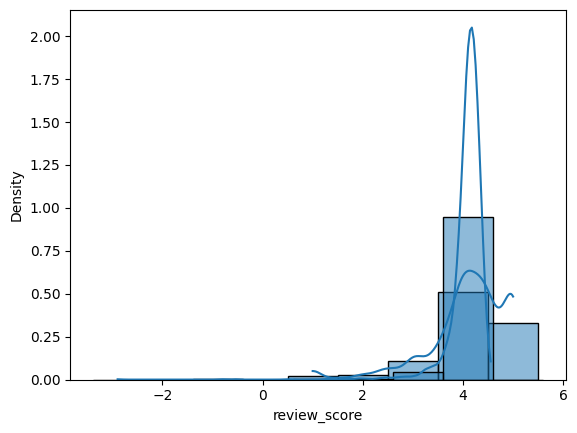

In [22]:
sns.histplot(sellers.review_score, kde=True, stat='density', discrete=True)
sns.histplot(model.predict(sellers_standardized[features]), kde=True, stat='density', discrete=True)

<AxesSubplot:ylabel='Density'>

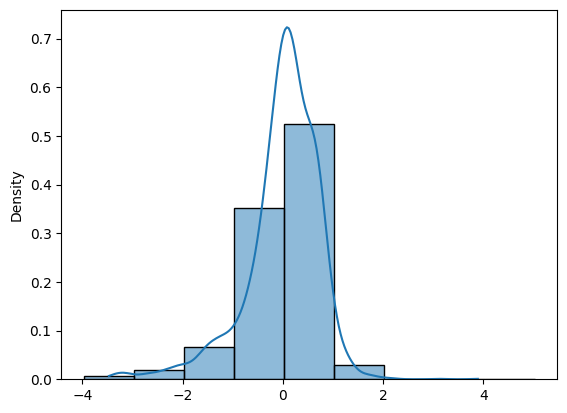

In [23]:
sns.histplot(model.resid, kde=True, stat='density', discrete=True)

### 2.3 Seller_state analysis

In [24]:
formula = 'review_score ~ C(seller_state)'
model2 = smf.ols(formula=formula, data=sellers).fit()

# top 5 coef with p-value < 0.05
from olist.utils import return_significative_coef
return_significative_coef(model2).tail()

variable   p_value      coef
12  C(seller_state)[T.PE]  0.041382  1.773696
1   C(seller_state)[T.BA]  0.036514  1.772447
15  C(seller_state)[T.RJ]  0.036379  1.731710
21  C(seller_state)[T.SP]  0.037823  1.713781
3   C(seller_state)[T.DF]  0.043756  1.690972

#### Note:

Some states have better reviews than others on average.
Let's check it out.

In [25]:
formula = 'review_score ~  sales + quantity + quantity_per_order + C(seller_state)'
model3 = smf.ols(formula=formula, data=sellers).fit()
return_significative_coef(model3).head(5+1)[1:]

variable   p_value      coef
16  C(seller_state)[T.RN]  0.016280  2.163358
4   C(seller_state)[T.ES]  0.013824  2.069100
8   C(seller_state)[T.MS]  0.029710  1.957293
11  C(seller_state)[T.PB]  0.027844  1.952623
9   C(seller_state)[T.MT]  0.040152  1.885717

In [26]:
formula = 'review_score ~ wait_time + C(seller_state)'
model3 = smf.ols(formula=formula, data=sellers).fit()
return_significative_coef(model3).head(5+1)[1:]

variable        p_value      coef
22  wait_time  1.479050e-117 -0.047765

#### Note:

Most states have a limited number of seller, so:
- We cannot conclude that "some states are inherently better than other for reasons that would be independent of the `wait_time`" 
- In other words, we cannot reject the hypothesis that "seller_state has no impact on review_score, other than through `wait_time`"